In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pyemma

$$
\Bigg(
    \begin{array}{cc}
    p(A|A) & p(B|A) \\
    p(A|B) & p(B|B) \\
    \end{array}
\Bigg)
$$

In [2]:
"""
sample a hidden state trajectory using the given transition matrix. 
For each hidden state, we compute Gaussian noise around the center of the state 
using the given covariance matrix.
"""
cov               = [[30.0, 0.0], [0.0, 0.01]]                                           
states            = [[0.0, 1.0], [0.0, -1.0]]                                          
transition_matrix = [[0.9, 0.1], [0.5, 0.5]]

cov               = np.asarray(cov, dtype=np.float32)
states            = np.asarray(states, dtype=np.float32)
transition_matrix = np.asarray(transition_matrix, dtype=np.float32)


length = 5000
dtraj = np.zeros(shape=(length,), dtype=np.intc)                          
dtraj[0] = np.random.randint(low=0, high=len(states))

for i in range(1, length):
    dtraj[i] = np.random.choice(len(states), size=1, p=transition_matrix[dtraj[i-1], :])          
    traj = states[dtraj, :] + \
    np.random.multivariate_normal(np.zeros(len(cov)), cov, size=length, check_valid='ignore')

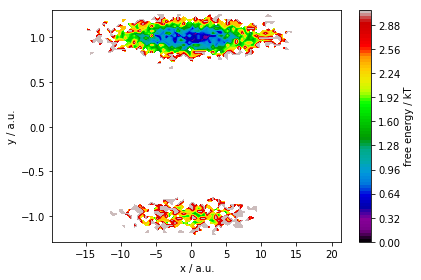

In [3]:
fig, ax = pyemma.plots.plot_free_energy(*traj.T, cmap=mpl.cm.nipy_spectral)
ax.set_xlabel('x / a.u.')
ax.set_ylabel('y / a.u.')
fig.tight_layout()